In [1]:
import pandas as pd
df=pd.read_csv("BankChurners.csv")

In [2]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df.shape

(10127, 23)

In [14]:
df.drop(columns=["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1","Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"]).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CLIENTNUM                         10127 non-null  int64  
 1   Customer_Age                      10127 non-null  int64  
 2   Dependent_count                   10127 non-null  int64  
 3   Months_on_book                    10127 non-null  int64  
 4   Total_Relationship_Count          10127 non-null  int64  
 5   Months_Inactive_12_mon            10127 non-null  int64  
 6   Contacts_Count_12_mon             10127 non-null  int64  
 7   Credit_Limit                      10127 non-null  float64
 8   Total_Revolving_Bal               10127 non-null  int64  
 9   Avg_Open_To_Buy                   10127 non-null  float64
 10  Total_Amt_Chng_Q4_Q1              10127 non-null  float64
 11  Total_Trans_Amt                   10127 non-null  int64  
 12  Tota

In [5]:
df["Marital_Status"].value_counts()

Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [6]:

df = pd.get_dummies(df,columns=['Attrition_Flag','Card_Category','Gender'],drop_first=True)


In [7]:
df.drop(columns=["Education_Level","Marital_Status","Income_Category"],inplace=True)

In [13]:
df["Card_Category_Silver"]=df["Card_Category_Silver"].astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Customer_Age                                                                                                                        10127 non-null  int64  
 2   Dependent_count                                                                                                                     10127 non-null  int64  
 3   Months_on_book                                                                   

In [16]:
df.duplicated().sum()

0

In [17]:
x=df.drop(columns=["Attrition_Flag_Existing Customer"])
y=df["Attrition_Flag_Existing Customer"]

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [19]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [20]:
std_xtrain=std.fit_transform(X_train)
std_xtest=std.fit_transform(X_test)

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [92]:
model = Sequential()

model.add(Dense(123,activation='relu',input_dim=21))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [93]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 123)               2706      
                                                                 
 dense_41 (Dense)            (None, 11)                1364      
                                                                 
 dense_42 (Dense)            (None, 1)                 12        
                                                                 
Total params: 4082 (15.95 KB)
Trainable params: 4082 (15.95 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [94]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(std_xtrain,Y_train,epochs=10,verbose=1,validation_split=0.2)


Epoch 1/10
203/203 [==============================] - 2s 3ms/step - loss: 0.0923 - accuracy: 0.9846 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 2/10
203/203 [==============================] - 1s 3ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3/10
203/203 [==============================] - 1s 3ms/step - loss: 6.8625e-04 - accuracy: 1.0000 - val_loss: 4.5809e-04 - val_accuracy: 1.0000
Epoch 4/10
203/203 [==============================] - 1s 3ms/step - loss: 3.3119e-04 - accuracy: 1.0000 - val_loss: 2.5233e-04 - val_accuracy: 1.0000
Epoch 5/10
203/203 [==============================] - 1s 3ms/step - loss: 1.9440e-04 - accuracy: 1.0000 - val_loss: 1.5863e-04 - val_accuracy: 1.0000
Epoch 6/10
203/203 [==============================] - 1s 3ms/step - loss: 1.2700e-04 - accuracy: 1.0000 - val_loss: 1.0826e-04 - val_accuracy: 1.0000
Epoch 7/10
203/203 [==============================] - 1s 3ms/step - loss: 8.8884e-05 - accuracy: 1.0000 - val_loss: 

In [95]:
x_per=model.predict(std_xtest)

64/64 [==============================] - 0s 2ms/step


In [96]:
x_per

array([[0.99999565],
       [0.9999758 ],
       [0.99998844],
       ...,
       [0.99997234],
       [0.9999834 ],
       [0.999983  ]], dtype=float32)

In [97]:
y_pred = x_per.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.16337611056268508

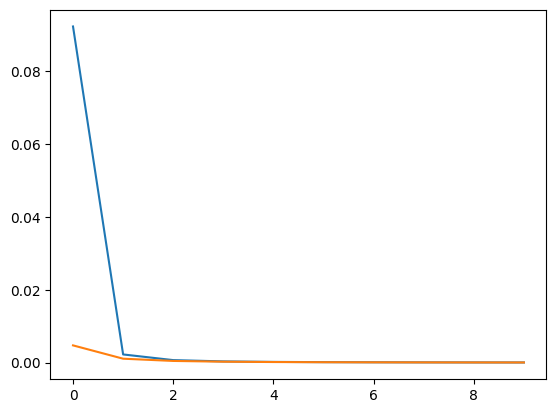

In [99]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

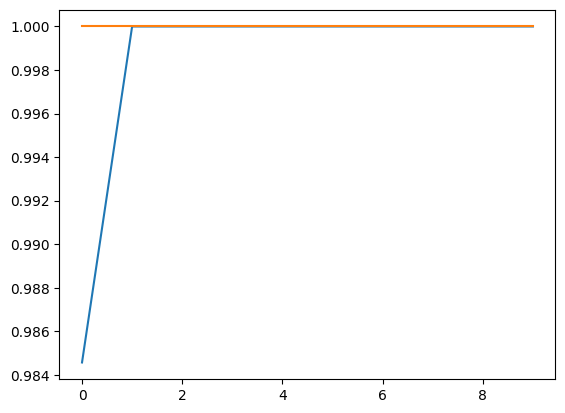

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])